In [57]:
import numpy as np
import pandas as pd
from IPython.display import Image, display


In [94]:
def f(arr):
    res = arr[0]
    second_res = -1

    for x in arr[1:]:
        print(x, res, second_res)
        if x > res:
            second_res = res
            res = x
        elif x<res:
            if second_res == -1:
                second_res = x
            elif x > second_res:
                second_res = x
    return res, second_res


In [97]:
arr = [1,1,0,1,1]
arr = [2,2,1,2,0,2,2]
f(arr)

2 2 -1
1 2 -1
2 2 1
0 2 1
2 2 1
2 2 1


(2, 1)

## Arrays

#### Maximum Subarray Sum

Cant use Kadanes, as it gives min sum as 0 and doesnt take into consideration negative sums <br>
This handles even when all elements are -ve -> max_sum also wud be negative

In [17]:
def max_subarray_sum(arr):
    max_so_far = arr[0]
    max_ending_here = arr[0]

    for x in arr[1:]:
        max_ending_here = max(max_ending_here+x,x) # either include this ele or take only this ele
        max_so_far = max(max_so_far, max_ending_here)
    
    return max_so_far

In [3]:
arr = [-2, -3, 4, -1, -2, 1, 5, -3]
print(max_subarray_sum(arr))

arr = [-2, -3, -4, -1, -2, -11, -5, -3]
print(max_subarray_sum(arr))

7
-1


#### Maximum Length Even Odd subarray

Same approach as Kadanes, <br>
At each step check if you can continue the previous subarray (even odd length), <br>
If you cant do so, then reset length and start the new Even-Odd subarray from current position <br

In [18]:
def max_even_odd_subarray(arr):
    n = len(arr)
    res = 1
    cur_len = 1

    for i in range(n):
        # check if cur element can be added to older sequence
        if (arr[i]%2 == 0 and arr[i-1]%2 != 0) or (arr[i]%2 != 0 and arr[i-1]%2 == 0): # can be added
            cur_len += 1
            res = max(res, cur_len)
        else: #start new subarray from here
            cur_len = 1
    return res


In [5]:
arr = [5, 10, 20, 6, 3, 8]
print(max_even_odd_subarray(arr))

3


#### Maximum Circular Subarray Sum

arr = [1,2,-2,4,5] -> you can use join last and first -> [4,5,1,2,-2] <br>
Max = MAX(Max of normal array, max of circular subarray)<br>

`max of circular subarray` = `SUM` - `min_value_subarray in between`<br>

[1,2,-2,4,5] -> min is -2 -> [1,2] -2 [4,5] -> you can reverse and add [5,4,1,2] <br>
[1,2,-4,2,-6,4,5] -> min = [-2, 2, -6] = -8 -> [1,2][-4,2,-6][4,5] -> [5,4,1,2,] <br><br>
In some case you get better sum in normal subarray, (so we take max of both)<br>
[-2,4,4,4,4,-8] <br>
In this case our circular sum would fail -> min would be [-8] <br>
But in this case our normal sum would work and handle this case <br>

In [60]:
def max_subarray_sum(arr):
    max_so_far = arr[0]
    max_ending_here = arr[0]

    for x in arr[1:]:
        max_ending_here = max(max_ending_here+x,x) # either include this ele or take only this ele
        max_so_far = max(max_so_far, max_ending_here)
    
    return max_so_far 
    
def min_subarray_sum(arr):
    min_till_now = arr[0]
    cur_min = arr[0]

    for x in arr[1:]:
        cur_min = min(cur_min+x, x)
        min_till_now = min(cur_min, min_till_now)
        
    return min_till_now

arr = [1,2,-2,4,5]
min_subarray_sum(arr)

-2

In [61]:
def min_circular_subarray_sum(arr):
    max_normal = max_subarray_sum(arr)

    min_sum = min_subarray_sum(arr)
    max_circular = sum(arr) - min_sum

    # if circular = 0, means it picked all ele as min_sub_array (you need to pick interior min and circular join outer ones which isnt possible here)
    if max_circular == 0: 
        return max_normal

    return max(max_normal, max_circular)

In [63]:
arr = [1,2,-2,4,5] # In this case we get better result by rotating array -> [|4,5,1,2|-2]
print(arr, min_circular_subarray_sum(arr))

arr = [-1,2,10,4,-5] # in this case we get better result from normal array instead of circular one -> [-1,|2,10,4|,-5]
print(arr, min_circular_subarray_sum(arr))


arr = [-12, -14] 
print(arr, min_circular_subarray_sum(arr))

[1, 2, -2, 4, 5] 12
[-1, 2, 10, 4, -5] 16
[-12, -14] -12


#### 3-Sum No Duplicates

No duplicate triplets are allowed <br>
Duplicate elements if present in array can be used <br>

##### Using HashSet to remove duplicates

In [20]:

def threeSum(arr):
    n = len(arr)
    target = 0
    arr = sorted(arr)
    res = set()
    
    for i in range(n-2):
        val = arr[i]
        
        lo =  i+1
        hi = n-1
        while lo<hi:
            c_sum = val + arr[lo] + arr[hi]
            if c_sum == target:
                res.add((val, arr[lo], arr[hi]))
                lo += 1
                hi -=1
            elif c_sum > target:
                hi -= 1
            else:
                lo += 1
    return res

In [21]:
arr = [-1,0,1,2,-1,-4]
threeSum(arr)

{(-1, -1, 2), (-1, 0, 1)}

##### Without using Hashset -> Handle implicitly in code

In [22]:

def threeSum(arr):
    n = len(arr)
    target = 0
    arr = sorted(arr)
    res = []
    
    #  [-1,0,1,2,-1,-4] -> [-4, -1, -1, 0, 1, 2]
    
    for i in range(n-2):
        if i!=0 and arr[i]==arr[i-1]: # if same ele was seen before ignore (why i-1? sorted array)
            continue
        val = arr[i]
        
        lo =  i+1
        hi = n-1
        while lo<hi:
            c_sum = val + arr[lo] + arr[hi]
            if c_sum == target:
                res.append((val, arr[lo], arr[hi]))
                
                # [0,1,lo=2,2,2,3,4,5,6,hi=6,7] let say you got needed ans=6, then next you need lo=3, hi=5
                while lo<hi and arr[lo]==arr[lo+1]: # increment until lo is not same as ans
                    lo += 1
                while lo<hi and arr[hi]==arr[hi-1]: # increment until hi is not same as ans
                    hi -= 1
                
                lo += 1
                hi -=1
            elif c_sum > target:
                hi -= 1
            else:
                lo += 1
    return res

In [23]:
arr = [-1,0,1,2,-1,-4]
threeSum(arr)

[(-1, -1, 2), (-1, 0, 1)]

#### 4-Sum No duplicates <br>

No duplicate indices are allowed but elements with different index but same value are fine <br>
[2,2,2,2,2] target=8 | result = [2,2,2,2] <br>

`USE HASHSET APPROACH ONLY`

##### Using HashSet

In [18]:
class FourSolution:
    def threeSum(self, arr, target):
        n = len(arr)
        res = set()
        
        for i in range(n-2):
            val = arr[i]
            
            lo =  i+1
            hi = n-1
            while lo<hi:
                c_sum = val + arr[lo] + arr[hi]
                if c_sum == target:
                    res.add((val, arr[lo], arr[hi]))
                    lo += 1
                    hi -=1
                elif c_sum > target:
                    hi -= 1
                else:
                    lo += 1
        return res
        
    def fourSum(self, arr, target):
        res = set()
        arr = sorted(arr)
        
        for i in range(len(arr)-3):
            x = arr[i]
            rem_target = target-x
            temp_res = self.threeSum(arr[i+1:], rem_target)
            
            for tup in temp_res:
                res.add((x,*tup))
        return res
        

In [19]:
arr = [1,0,-1,0,-2,2]
print(FourSolution().fourSum(arr,target=0))

arr = [2,2,2,2,2]
print(FourSolution().fourSum(arr,target=8))

{(-2, -1, 1, 2), (-1, 0, 0, 1), (-2, 0, 0, 2)}
{(2, 2, 2, 2)}


#### Minimum Group Flips to make Same [Binary Array]

**Direct Answer Trick** <br>
1. **Lowest flip group** -> element that occurs second (0 or 1) <br>
So just check which elements appears second n print all its groups 
2. abs((no of groups of `0`) - (no of groups of `1`)) = `0` or `1`


In [42]:
def min_group_flips(arr):
    counts = [0,0]
    counts[arr[0]] = 1

    for i in range(1,len(arr)):
        if arr[i] == arr[i-1]:
            continue
        else:
            counts[arr[i]] += 1
    return min(counts)


In [43]:
def min_group_flips_with_index(arr):
    n = len(arr)
    flips = {0:[], 1:[]}
    
    cur_ele = arr[0]
    cur_start_index = 0

    for i in range(1,n):
        if arr[i] == arr[i-1]:
            continue
        else: # old streak broken | start new streak 
            flips[cur_ele].append((cur_start_index,i-1))
            cur_start_index = i # reset index
            cur_ele = arr[i] # reset curEle
            
    flips[cur_ele].append((cur_start_index,n-1))

    count_flips = [len(flips[key]) for key in [0,1]]
    result = 0 if count_flips[0] < count_flips[1] else 1
    
    return (result, count_flips[result], flips[result])


    

In [41]:
arr = [1,1,0,0,0,1] # res = 1 [2:4]
print(min_group_flips(arr))
print(min_group_flips_with_index(arr))

arr = [1,0,0,0,1,0,0,1,1,1,1] # res = 2 [1:3, 5:6]
print(min_group_flips(arr))
print(min_group_flips_with_index(arr))


1
(0, 1, [(2, 4)])
2
(0, 2, [(1, 3), (5, 6)])


#### Check if array is sorted and rotated

https://practice.geeksforgeeks.org/problems/check-if-array-is-sorted-and-rotated-clockwise <br>
Here return True iff array is sorted(increasing or decreasing) AND rotated<br><br>

**Logic**<br>
If array is sorted(normal/reverse) and rotated then, we know that there will be only one error/mismatch (at point of rotation)<br>
1. In proper sort -> at one place you will have `a[i]`>`a[i-1]`<br>
2. In reverse sort -> at one place you will have `a[i]`<`a[i-1]`<br>

if either of (1) or (2) == 0 -> Array is sorted but not rotated<br>
if both (1) and (2) > 1 -> rotated but not sorted<br>
Only if either (1) or (2) == 1 -> Sorted and rotated<br>

**Note**: Since we have sorted + rotated array you also need to check if first and last element are in order<br>

In [67]:
def checkRotatedAndSorted(arr,n):
    sort_err = 0
    reverse_sort_err = 0
    
    for i in range(1,n):
        if arr[i-1] > arr[i]:
            sort_err += 1
        elif arr[i-1] < arr[i]:
            reverse_sort_err += 1
            
    # print(sort_err, reverse_sort_err, arr)
    if sort_err==1 or reverse_sort_err==1:
        if arr[0] < arr[-1]:# proper sorting error
            sort_err += 1
        else:
            reverse_sort_err += 1
        
        if sort_err==1 or reverse_sort_err==1:
            return True
    return False

#### Subarray with Target Sum (Non-Negative Nos)

Using Sliding Window Method

In [47]:
def target_subarray_sum(arr, target):
    n = len(arr)
    start = 0
    end = 0
    cur_sum = arr[0] # inititially the window size is 1

    while start<=end and start<n and end<n:
        if cur_sum == target:
            return (start, end)

        if cur_sum < target: # increase window size -> add ele from right
            end += 1
            cur_sum += arr[end]
        elif cur_sum > target: # reduce window size -> remove ele from left
            cur_sum -= arr[start]
            start += 1
    return -1


In [48]:
arr = [1,4,20,3,10,5] 
target = 33 # [20,3,10]

target_subarray_sum(arr, target)


(2, 4)

#### Prefix Sum Problems

##### Max Subarray with Given Target (Positive + Negative Nos)

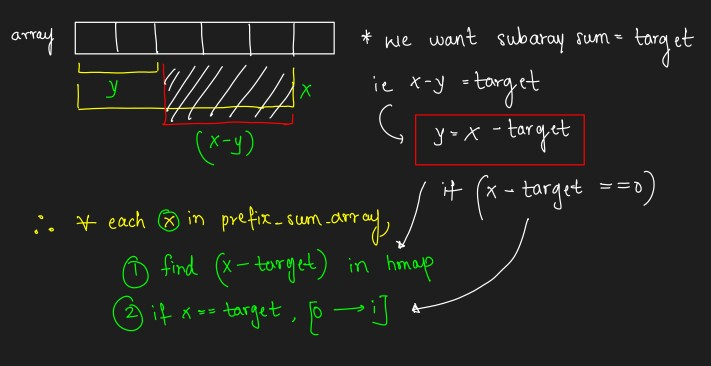

In [62]:
display(Image(filename='src/max_len_subarray_sum.jpg'))

In [63]:
def longest_subarray_target(arr, target):
    n = len(arr)
    cSum = maxLen = 0
    hmap = {}
    resIndex = [0,0]

    for i, x in enumerate(arr):
        cSum += x
        findHmap = cSum-target
        if cSum == target: # [0 ... i] = target
            newLen = i+1
            if newLen > maxLen:
                maxLen = newLen
                resIndex[0], resIndex[1] = 0, i
        elif findHmap in hmap: # Target found
            newLen = i-hmap[findHmap]
            if newLen > maxLen:
                maxLen = newLen
                resIndex[0], resIndex[1] = hmap[findHmap]+1, i
        elif cSum not in hmap:  # why dont always add? [We need left most index -> longest subarray, so if a sum is already there dont add newwer one]
            hmap[cSum] = i
            
    return (maxLen, resIndex)



In [64]:
arr = [5,6,-5,5,3,5,3,-2,0]
print(longest_subarray_target(arr, 8))

arr = [5,5,-5,-5,2]
print(longest_subarray_target(arr, 2))

(4, [2, 5])
(5, [0, 4])


##### Count all Subarrays with sum as Target

In [6]:
def count_subarray_sum_target(arr, target):
    hmap = {0:1} # consider initial csum as 0
    count = 0
    csum = 0
    
    for x in arr:
        csum += x
        
        if csum-target in hmap:
            count += hmap[csum-target]
        
        # If you have already seen this cur_sum ,that means
        # there are 2 ways to form sum in case any result uses cur_sum
        hmap[csum] = hmap.get(csum,0)+1
        
        # in longest_subarray_target we dont include csum if already seen. Why?
        # because we need longest, n earliest seen csum, longer the answer subarray
        
    return count
            

In [7]:
arr, target = [1,-1,0], 0
print(count_subarray_sum_target(arr, target))

arr, target = [1,2,1,2,1], 3
print(count_subarray_sum_target(arr, target))

arr, target = [1,2,3], 3
print(count_subarray_sum_target(arr, target))

3
4
2


##### Subarray sum equals Zero

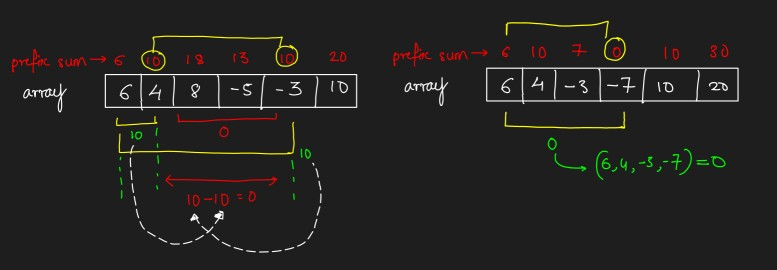

In [69]:
display(Image(filename='src/subarray_sum_0.jpg'))

Solution
1. Calculate Prefix sum
2. While calculating prefix sum array, 
    - if `cur_sum` was previously seen
        - THEN, arr[`last_seen_sum_index`+1 : `cur_sum_index`] = 0  
    - if `cur_sum` = 0,
        - then, arr[0 : `cur_sum_index`] = 0


In [72]:
def check_zero_sum(arr):
    '''
    Return [start_index, end_index] which has subarray sum = 0
    '''
    n = len(arr)
    curSum = 0
    hist = {}

    curSum = 0
    for i,x in enumerate(arr):
        curSum += x
        if x in hist:
            return (hist[x]+1,i)
        elif curSum == 0:
            return (0,i)
        else:
            hist[curSum] = i
    return None


In [73]:
arr = [10, 20, -30, 1, 6]
check_zero_sum(arr)

(0, 2)

##### Equilibrium Point

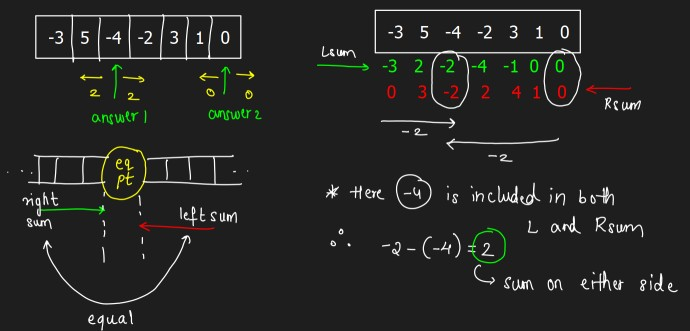

In [66]:

display(Image(filename='src/Equilibrium_Point.jpg'))

In [67]:

def equilibrium(arr):
    '''
    Return equilibrium point
    '''
    n = len(arr)
    lSum = [0]*n

    cSum = 0
    for i in range(n):  # L->R Sum
        cSum += arr[i]
        lSum[i] = cSum

    cSum = 0
    for i in reversed(range(n)):  # L<-R Sum
        cSum += arr[i]
        if cSum == lSum[i]:
            return i
    return None
    
    
arr = [-3,5,-4,-2,3,1]
equilibrium(arr)

2

In [68]:
arr = [-3,5,-4,-2,3,1]
equilibrium(arr)

2

#### Maximum Occuring number in given ranges

https://practice.geeksforgeeks.org/problems/maximum-occured-integer4602/

Solution works only when we know max_range else calculate frequencies using hashmap and do it


In [15]:
def maxOccured(L,R,N,maxx):
        arr = [0 for _ in range(maxx+2)]
        
        for i in range(N):
            arr[L[i]] += 1
            arr[R[i]+1] -= 1
        
        # calculate prefix sums
        csum = arr[0]
        for i in range(1,len(arr)):
            arr[i] += arr[i-1]

        res, max_count = 0, arr[0]
        for i in range(1,len(arr)):
            if arr[i] > max_count:
                res = i
                max_count = arr[i]

        return res

In [16]:
L = [1,4,3,1]
R = [15,8,5,4]
maxOccured(L, R, 4, 15)

4

## Matrix

#### Spiral Matrix

In [27]:
def spiral(arr):
    nr = len(arr) - 1
    nc = len(arr[0]) - 1

    rStart, rEnd = 0, nr
    cStart, cEnd = 0, nc

    res = []
    
    while rStart<=rEnd and cStart<=cEnd:
        for i in range(cStart, cEnd+1):
            res.append(arr[rStart][i])
        rStart += 1
        
        for i in range(rStart, rEnd+1):
            res.append(arr[i][cEnd])
        cEnd -= 1
        
        if rStart <= rEnd:
            for i in reversed(range(cStart, cEnd+1)):
                res.append(arr[rEnd][i])
            rEnd -= 1
        
        if cStart <= cEnd:
            for i in reversed(range(rStart, rEnd+1)):
                res.append(arr[i][cStart])
            
            cStart += 1
    return res

            


In [29]:
arr = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

arr1 = [
    [1, 2, 3,14],
    [4, 5, 6, 34],
    [7, 8, 9, 34]
]


print(spiral(arr))
print(spiral(arr1))

[1, 2, 3, 6, 9, 8, 7, 4, 5]
[1, 2, 3, 14, 34, 34, 9, 8, 7, 4, 5, 6]


#### Spiral Matrix II

Given `n` -> fill a `nxn` matrix spirally from 1 to n*n

In [32]:

def generate_spiral_matrix(n):
    fill_ele = 1
    arr = [[0 for _ in range(n)] for _ in range(n)]
    
    nr = len(arr) - 1
    nc = len(arr[0]) - 1

    rStart, rEnd = 0, nr
    cStart, cEnd = 0, nc

    res = []

    while rStart<=rEnd and cStart<=cEnd:
        for i in range(cStart, cEnd+1):
            arr[rStart][i] = fill_ele
            fill_ele += 1
        rStart += 1

        for i in range(rStart, rEnd+1):
            arr[i][cEnd] = fill_ele
            fill_ele += 1
        cEnd -= 1

        if rStart <= rEnd:
            for i in reversed(range(cStart, cEnd+1)):
                arr[rEnd][i] = fill_ele
                fill_ele += 1
            rEnd -= 1

        if cStart <= cEnd:
            for i in reversed(range(rStart, rEnd+1)):
                arr[i][cStart] = fill_ele
                fill_ele += 1

            cStart += 1
    return arr

    

In [37]:
res = generate_spiral_matrix(n=4)
print(*res, sep="\n")

[1, 2, 3, 4]
[12, 13, 14, 5]
[11, 16, 15, 6]
[10, 9, 8, 7]


## Recursion

#### Tower of Hanoi

In [16]:
def toh(n, fromm, to, aux):
    if n==0:
        return
    
    toh(n-1,fromm,aux,to)
    print(f"move disk {n} from rod {fromm} to {to}")
    toh(n-1,aux,to,fromm)

In [17]:
toh(3,'A','C','B')

move disk 1 from rod A to C
move disk 2 from rod A to B
move disk 1 from rod C to B
move disk 3 from rod A to C
move disk 1 from rod B to A
move disk 2 from rod B to C
move disk 1 from rod A to C


## Dynamic Programming

#### Longest Palindrome Substring

- https://www.youtube.com/watch?v=UflHuQj6MVA
- https://www.geeksforgeeks.org/longest-palindrome-substring-set-1/
 <br>
1. if len(str) == 1, then its a palindrome <br>
2. if len(str) == 2, & str[start] == str[end] => then its palindrome <br>
3. len(str) > 2, (str[start]==str[end]) && is_palindrome(str[start+1:end-1])  <br>
ababa -> a==a and is_palindrome(bab) <br> <br>
Here, in our DP table -> i=startIndex, j=endIndex
- We first fill dp[i][j] where i==j with 1 [Len == 1]
- Then fill dp[i][j] where (j-i)=1 [Len == 2]
- Fill remaining Lengths

In [30]:
def LPS(str):
    n = len(str)
    dp = [[False for _ in range(n)] for _ in range(n)]
    
    i = 0 # fill str with len == 1
    while i<n:
        dp[i][i] = True
        i +=1

    i=1 # fill str with len==2
    while i<n:
        if str[i-1] == str[i]:
            dp[i-1][i] = True
        i += 1

    k = 3
    for k in range(3,n):
        for startIndex in range(0,n-k+1):
            endIndex = startIndex + k -1
            if str[startIndex] == str[endIndex] and dp[startIndex+1][endIndex-1]:
                dp[startIndex][endIndex] = True


    
    print(*dp,sep="\n")

In [31]:
# 0 1 2 3 4 5 6
k = 3

In [32]:
str = "forgeeksskeegfor"
str = "xwowy"
LPS(str)

[True, False, False, False, False]
[False, True, False, True, False]
[False, False, True, False, False]
[False, False, False, True, False]
[False, False, False, False, True]


## Practice Problems

#### Return Largest & Second Largest Element in O(N)

In [101]:
def largestAndSecondLargest(arr):

        res = arr[0]
        second_res = -1
    
        for x in arr[1:]:
            if x > res:
                second_res = res
                res = x
            elif x<res:
                if second_res == -1:
                    second_res = x
                elif x > second_res:
                    second_res = x
                    
        return res,second_res

In [103]:
arr = [1,2,3,4,5]
print(largestAndSecondLargest(arr))

arr = [2,2,2,0,2,1]
print(largestAndSecondLargest(arr))

arr = [2,2,2,1,2,0]
print(largestAndSecondLargest(arr))

arr = [2,2,2,2,2,2]
print(largestAndSecondLargest(arr))


(5, 4)
(2, 1)
(2, 1)
(2, -1)


#### Trap Rainwater

In [120]:
def trappingWater(arr,n):
    left = [0 for _ in range(n)]
    right = [0 for _ in range(n)]
    
    left[0] = arr[0]
    for i in range(1,n):
        left[i] = max(left[i-1],arr[i])
        
    right[-1] = arr[-1]
    for i in reversed(range(0,n-1)):
        right[i] = max(right[i+1],arr[i])
        
    total_water = 0
    for i in range(n):
        total_water += min(left[i],right[i])-arr[i]
    
    return total_water

In [121]:
trappingWater([7,4,0,9],4)

10

#### Phone Keypad Dialing

In [ ]:
class Solution:
    result = []
    key_chars = {
        2 : list("abc"), 
        3 : list("def"),
        4 : list("ghi"),
        5 : list("jkl"),
        6 : list("mno"),
        7 : list("pqrs"),
        8 : list("tuv"),
        9 : list("wxyz")
    }
    
    def get_possible_ways(self, up,p):
        # up -> list, p -> String initially empty
        if len(up) == 0:
            self.result.append(p)
            return
        
        cur_n = up[0]
        up = up[1:]
        
        for ch in self.key_chars[cur_n]:
            self.get_possible_ways(up,p+ch)
        
        
    #Function to find list of all words possible by pressing given numbers.
    def possibleWords(self,a,N):
        self.get_possible_ways(a,"")
        return self.result

In [ ]:
arr = [2,2,4]
print(*Solution().possibleWords(arr, len(arr)),sep=" ")

aag aah aai abg abh abi acg ach aci bag bah bai bbg bbh bbi bcg bch bci cag cah cai cbg cbh cbi ccg cch cci aag aah aai abg abh abi acg ach aci bag bah bai bbg bbh bbi bcg bch bci cag cah cai cbg cbh cbi ccg cch cci


#### Print Powerset of String (lexographically ordered)

Not same as SUBSTRING (Here we dont repeat indices but elememts may repeat)

In [1]:
# Basically L-> Iteration | You either include cur_index or dont in result | Print once all indices are visited (Either picked or not doesnt matter)
def powerSet(S, cur_pick_index, cur_string):
    if cur_pick_index == len(S):
        print(cur_string)
        return 
    
    powerSet(S, cur_pick_index+1, cur_string+ S[cur_pick_index])
    powerSet(S, cur_pick_index+1, cur_string)



In [2]:
s = "xxyzz" # a ab abc ac b bc c

powerSet(s, 0,"")

In [57]:
def powerSet(string , index , curr):
     
    # string : Stores input string
    # curr : Stores current subset
    # index : Index in current subset, curr
    if index == len(string):
        print(curr)
        return
     
    powerSet(string, index + 1,
             curr + string[index])
    powerSet(string, index + 1, curr)
     

In [3]:
powerSet("xxyzz",0,"")

#### Maximize Index Distance

Given an array A[] of N positive integers. The task is to find the maximum of j - i subjected to the constraint of A[i] < A[j] and i < j.

**Solution**
1. Sort array based on val n store (idx,val); [(index,val),.......] <br>
2. Now automatically the first condition is fulfilled i.e all elements before `x` are less than `x` since we sorted it <br>
3. Now traverse this sorted array, n check which index pair gives max distance <br>
   At index `i` max_len = cur_index - smallest index before `i` or till `i` <br>

DRY RUN
1. arr = [34, 8, 10, 3, 2, 80, 30, 33, 1]
2. arr = [(0, 34), (1, 8), (2, 10), (3, 3), (4, 2), (5, 80), (6, 30), (7, 33), (8, 1)]
3. Sorting acc to values : [(8, 1), (4, 2), (3, 3), (1, 8), (2, 10), (6, 30), (7, 33), (0, 34), (5, 80)]
4. Indices : [8, 4, 3, 1, 2, 6, 7, 0, 5]

Now in indices find `i,j` such that `j-i` in maximized which is same as <br>
For each index `j` find an index before it and lowest -> `j`-`lowest_index_before_j` <br>
Here we for sure know that `arr[i]`<=`arr[j]` because array is sorted acc to values first

In [135]:
def maxIndexDiff(arr):
    arr = list(enumerate(arr)) # [index,val]
    print(arr)
    arr = sorted(arr, key=lambda x : x[1])
    print(arr)

    min_index = float('inf')
    max_diff = -1

    for index, val in arr:
        min_index = min(min_index,index)
        max_diff = max(max_diff, index-min_index)
    
    return max_diff


In [136]:
arr = [34, 8, 10, 3, 2, 80, 30, 33, 1]
maxIndexDiff(arr)

[(0, 34), (1, 8), (2, 10), (3, 3), (4, 2), (5, 80), (6, 30), (7, 33), (8, 1)]
[(8, 1), (4, 2), (3, 3), (1, 8), (2, 10), (6, 30), (7, 33), (0, 34), (5, 80)]


6

In [36]:
def numberOfWays(coins,n,target):
    dp = [[0 for _ in range(target+1)] for _ in range(n)]
    
    for i in range(n):
        for j in range(target+1):
            if j==0:
                dp[i][j] = 1
            elif i==0: # only first coin is available -> either same or divisible by coins[0]
                dp[i][j] = 1 if coins[0] == j or j%coins[0] == 0 else 0
            elif coins[i] > j:
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = dp[i-1][j] + dp[i][j-coins[i]]
                
    print(*dp,sep="\n")
    return dp[n-1][target]

In [39]:
coins = [1,2]
target = 2

print(numberOfWays(coins, len(coins), target))


[1, 1, 1]
[1, 1, 2]
2
